In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.wkt import loads
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [146]:
tracts_demo = gpd.read_file('../Data/tract_with_info_v3.shp')
tracts_demo.set_index('Tract',inplace=True)
tracts_demo.head()

,Pop_Tot,Pop_18,%White,%Black,%Hispanic_,%Asian,%Other,%Mixed,%Edu_hs,%Edu_bac,...,J_W_2,J_B_2,J_B_3,Median_Inc,Agg_Inc,M_Age_Wor,M_Age_All,Center_Lat,Center_Lon,geometry
Tract,,,,,,,,,,,,,,,,,,,,,
36061009800,7302,6646,75.458778,2.095316,9.832922,10.832649,0.136949,1.643385,95.786940,76.482094,...,654,11,39,129167,862545500.0,36.1,41.6,40.755788,-73.967775,"POLYGON ((-73.96433 40.75638, -73.96479 40.755..."
36061010200,122,102,54.918033,5.737705,11.475410,1.639344,22.950820,3.278689,100.000000,67.647059,...,5,0,0,-666666666,5456900.0,37.5,39.7,40.759424,-73.974449,"POLYGON ((-73.97124 40.76094, -73.97170 40.760..."
36061010400,811,790,63.008631,1.479655,9.001233,19.235512,6.041924,1.233046,97.594937,81.392405,...,109,0,21,125882,137802400.0,41.8,51.4,40.760779,-73.977673,"POLYGON ((-73.97446 40.76229, -73.97491 40.761..."
36061011300,98,98,15.306122,38.775510,0.000000,33.673469,0.000000,12.244898,89.795918,44.897959,...,0,0,3,95313,4742200.0,32.1,43.4,40.754775,-73.987870,"POLYGON ((-73.98412 40.75484, -73.98460 40.754..."
36061013000,3314,2898,87.326494,0.603500,5.461678,4.345202,0.603500,1.659626,99.309869,83.850932,...,331,0,41,196964,692282600.0,49.8,57.7,40.772736,-73.964734,"POLYGON ((-73.96148 40.77432, -73.96194 40.773..."


In [147]:
tracts_demo['%NonWhite'] = tracts_demo[['%Black', '%Hispanic_', '%Asian',
       '%Other', '%Mixed']].sum(axis = 1)

In [148]:
tracts_demo.columns

Index(['Pop_Tot', 'Pop_18', '%White', '%Black', '%Hispanic_', '%Asian',
       '%Other', '%Mixed', '%Edu_hs', '%Edu_bac', 'J_Tot', 'J_W_1', 'J_B_1',
       'J_W_2', 'J_B_2', 'J_B_3', 'Median_Inc', 'Agg_Inc', 'M_Age_Wor',
       'M_Age_All', 'Center_Lat', 'Center_Lon', 'geometry', '%NonWhite'],
      dtype='object')

In [149]:
tracts_demo = tracts_demo[['Pop_Tot', 'Pop_18', '%White', '%NonWhite','%Black', '%Hispanic_', '%Asian',
       '%Other', '%Mixed', '%Edu_hs', '%Edu_bac', 'J_Tot', 'J_W_1', 'J_B_1', 'Median_Inc', 'Agg_Inc', 'M_Age_Wor',
       'M_Age_All']]
tracts_demo.head()

,Pop_Tot,Pop_18,%White,%NonWhite,%Black,%Hispanic_,%Asian,%Other,%Mixed,%Edu_hs,%Edu_bac,J_Tot,J_W_1,J_B_1,Median_Inc,Agg_Inc,M_Age_Wor,M_Age_All
Tract,,,,,,,,,,,,,,,,,,
36061009800,7302,6646,75.458778,24.541222,2.095316,9.832922,10.832649,0.136949,1.643385,95.786940,76.482094,4615,3387,524,129167,862545500.0,36.1,41.6
36061010200,122,102,54.918033,45.081967,5.737705,11.475410,1.639344,22.950820,3.278689,100.000000,67.647059,63,49,9,-666666666,5456900.0,37.5,39.7
36061010400,811,790,63.008631,36.991369,1.479655,9.001233,19.235512,6.041924,1.233046,97.594937,81.392405,597,454,13,125882,137802400.0,41.8,51.4
36061011300,98,98,15.306122,84.693878,38.775510,0.000000,33.673469,0.000000,12.244898,89.795918,44.897959,51,41,7,95313,4742200.0,32.1,43.4
36061013000,3314,2898,87.326494,12.673506,0.603500,5.461678,4.345202,0.603500,1.659626,99.309869,83.850932,1563,1081,110,196964,692282600.0,49.8,57.7


In [150]:
len(tracts_demo)

2055

<AxesSubplot:>

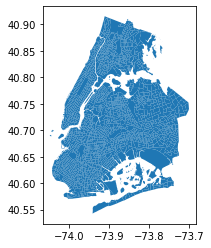

In [151]:
tracts_gdf = gpd.read_file('../Data/2010_Census_Tracts/2010_Census_Tracts.shp')
tracts_gdf.plot()

In [152]:
len(tracts_gdf)

2055

In [153]:
tracts_gdf.head()

,ctlabel,boro_code,boro_name,ct2010,boro_ct201,cdeligibil,ntacode,ntaname,puma,shape_leng,shape_area,geoid,Center_Lat,Center_Lon,area_km2,geometry
0,98,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.20030845,1906016.47074,36061009800,40.755788,-73.967775,0.177075,"POLYGON ((-73.96433 40.75638, -73.96479 40.755..."
1,102,1,Manhattan,010200,1010200,I,MN17,Midtown-Midtown South,3807,5687.80243891,1860992.68163,36061010200,40.759424,-73.974449,0.172893,"POLYGON ((-73.97124 40.76094, -73.97170 40.760..."
2,104,1,Manhattan,010400,1010400,I,MN17,Midtown-Midtown South,3807,5693.03636707,1864600.43538,36061010400,40.760779,-73.977673,0.173228,"POLYGON ((-73.97446 40.76229, -73.97491 40.761..."
3,113,1,Manhattan,011300,1011300,I,MN17,Midtown-Midtown South,3807,5699.86064037,1890907.25105,36061011300,40.754775,-73.987870,0.175672,"POLYGON ((-73.98412 40.75484, -73.98460 40.754..."
4,130,1,Manhattan,013000,1013000,I,MN40,Upper East Side-Carnegie Hill,3805,5807.97295649,1918144.56374,36061013000,40.772736,-73.964734,0.178202,"POLYGON ((-73.96148 40.77432, -73.96194 40.773..."


In [154]:
transit_access=pd.read_csv('../Data/weighted_tt.csv')
transit_access = transit_access.iloc[:, 1:]
transit_access['geoid'] = transit_access['geoid'].astype(str)
transit_access.set_index('geoid', inplace=True)
transit_access.head()

,ctlabel,boro_code,boro_name,ct2010,boro_ct2010,cdeligibil,ntacode,ntaname,puma,shape_leng,...,CBD16,CBD17,CBD18,CBD19,CBD20,CBD21,CBD22,w_tt,mean_tt,min_tt
geoid,,,,,,,,,,,,,,,,,,,,,
36061009800,98.0,1,Manhattan,9800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.200308,...,23.0,27.0,25.0,15.0,19.0,13.0,38.0,18.237742,25.409091,3.0
36061010200,102.0,1,Manhattan,10200,1010200,I,MN17,Midtown-Midtown South,3807,5687.802439,...,20.0,27.0,22.0,22.0,19.0,17.0,38.0,16.932766,24.545455,10.0
36061010400,104.0,1,Manhattan,10400,1010400,I,MN17,Midtown-Midtown South,3807,5693.036367,...,21.0,28.0,22.0,27.0,22.0,17.0,39.0,18.211283,25.045455,12.0
36061011300,113.0,1,Manhattan,11300,1011300,I,MN17,Midtown-Midtown South,3807,5699.860640,...,15.0,18.0,19.0,18.0,21.0,16.0,43.0,13.227767,19.863636,7.0
36061013000,130.0,1,Manhattan,13000,1013000,I,MN40,Upper East Side-Carnegie Hill,3805,5807.972956,...,32.0,36.0,36.0,11.0,17.0,6.0,51.0,28.875500,31.590909,6.0


In [155]:
len(transit_access)

2041

In [156]:
#merge
tract_info = transit_access.join(tracts_demo,how = 'inner')
tract_info.head()

,ctlabel,boro_code,boro_name,ct2010,boro_ct2010,cdeligibil,ntacode,ntaname,puma,shape_leng,...,%Mixed,%Edu_hs,%Edu_bac,J_Tot,J_W_1,J_B_1,Median_Inc,Agg_Inc,M_Age_Wor,M_Age_All
36061009800,98.0,1,Manhattan,9800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.200308,...,1.643385,95.786940,76.482094,4615,3387,524,129167,862545500.0,36.1,41.6
36061010200,102.0,1,Manhattan,10200,1010200,I,MN17,Midtown-Midtown South,3807,5687.802439,...,3.278689,100.000000,67.647059,63,49,9,-666666666,5456900.0,37.5,39.7
36061010400,104.0,1,Manhattan,10400,1010400,I,MN17,Midtown-Midtown South,3807,5693.036367,...,1.233046,97.594937,81.392405,597,454,13,125882,137802400.0,41.8,51.4
36061011300,113.0,1,Manhattan,11300,1011300,I,MN17,Midtown-Midtown South,3807,5699.860640,...,12.244898,89.795918,44.897959,51,41,7,95313,4742200.0,32.1,43.4
36061013000,130.0,1,Manhattan,13000,1013000,I,MN40,Upper East Side-Carnegie Hill,3805,5807.972956,...,1.659626,99.309869,83.850932,1563,1081,110,196964,692282600.0,49.8,57.7


In [157]:
len(tract_info)

2041

In [158]:
tract_info.columns

Index(['ctlabel', 'boro_code', 'boro_name', 'ct2010', 'boro_ct2010',
       'cdeligibil', 'ntacode', 'ntaname', 'puma', 'shape_leng', 'shape_area',
       'geometry', 'Bus_Access', 'Subway_Access', 'Bus_Count', 'Subway_Count',
       'Center_Lat', 'Center_Lon', 'area_km2', 'formatted', 'CBD1', 'CBD2',
       'CBD3', 'CBD4', 'CBD5', 'CBD6', 'CBD7', 'CBD8', 'CBD9', 'CBD10',
       'CBD11', 'CBD12', 'CBD13', 'CBD14', 'CBD15', 'CBD16', 'CBD17', 'CBD18',
       'CBD19', 'CBD20', 'CBD21', 'CBD22', 'w_tt', 'mean_tt', 'min_tt',
       'Pop_Tot', 'Pop_18', '%White', '%NonWhite', '%Black', '%Hispanic_',
       '%Asian', '%Other', '%Mixed', '%Edu_hs', '%Edu_bac', 'J_Tot', 'J_W_1',
       'J_B_1', 'Median_Inc', 'Agg_Inc', 'M_Age_Wor', 'M_Age_All'],
      dtype='object')

In [159]:
perc_ls = ['%White', '%Black', '%Hispanic_', '%Asian','%Other', '%Mixed', '%Edu_hs', '%Edu_bac']
for perc_item in perc_ls:
    col_str = perc_item[1:]
    tract_info[col_str+'Tot'] = tract_info['Pop_Tot']*tract_info[perc_item]/100
    tract_info[col_str+'Above18'] = tract_info['Pop_18']*tract_info[perc_item]/100

In [160]:
tract_info.columns

Index(['ctlabel', 'boro_code', 'boro_name', 'ct2010', 'boro_ct2010',
       'cdeligibil', 'ntacode', 'ntaname', 'puma', 'shape_leng', 'shape_area',
       'geometry', 'Bus_Access', 'Subway_Access', 'Bus_Count', 'Subway_Count',
       'Center_Lat', 'Center_Lon', 'area_km2', 'formatted', 'CBD1', 'CBD2',
       'CBD3', 'CBD4', 'CBD5', 'CBD6', 'CBD7', 'CBD8', 'CBD9', 'CBD10',
       'CBD11', 'CBD12', 'CBD13', 'CBD14', 'CBD15', 'CBD16', 'CBD17', 'CBD18',
       'CBD19', 'CBD20', 'CBD21', 'CBD22', 'w_tt', 'mean_tt', 'min_tt',
       'Pop_Tot', 'Pop_18', '%White', '%NonWhite', '%Black', '%Hispanic_',
       '%Asian', '%Other', '%Mixed', '%Edu_hs', '%Edu_bac', 'J_Tot', 'J_W_1',
       'J_B_1', 'Median_Inc', 'Agg_Inc', 'M_Age_Wor', 'M_Age_All', 'WhiteTot',
       'WhiteAbove18', 'BlackTot', 'BlackAbove18', 'Hispanic_Tot',
       'Hispanic_Above18', 'AsianTot', 'AsianAbove18', 'OtherTot',
       'OtherAbove18', 'MixedTot', 'MixedAbove18', 'Edu_hsTot',
       'Edu_hsAbove18', 'Edu_bacTot', 'Edu_b

In [161]:
tract_info.head()

,ctlabel,boro_code,boro_name,ct2010,boro_ct2010,cdeligibil,ntacode,ntaname,puma,shape_leng,...,AsianTot,AsianAbove18,OtherTot,OtherAbove18,MixedTot,MixedAbove18,Edu_hsTot,Edu_hsAbove18,Edu_bacTot,Edu_bacAbove18
36061009800,98.0,1,Manhattan,9800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.200308,...,791.0,719.937825,10.0,9.101616,120.0,109.219392,6994.362323,6366.0,5584.722540,5083.0
36061010200,102.0,1,Manhattan,10200,1010200,I,MN17,Midtown-Midtown South,3807,5687.802439,...,2.0,1.672131,28.0,23.409836,4.0,3.344262,122.000000,102.0,82.529412,69.0
36061010400,104.0,1,Manhattan,10400,1010400,I,MN17,Midtown-Midtown South,3807,5693.036367,...,156.0,151.960543,49.0,47.731196,10.0,9.741060,791.494937,771.0,660.092405,643.0
36061011300,113.0,1,Manhattan,11300,1011300,I,MN17,Midtown-Midtown South,3807,5699.860640,...,33.0,33.000000,0.0,0.000000,12.0,12.000000,88.000000,88.0,44.000000,44.0
36061013000,130.0,1,Manhattan,13000,1013000,I,MN40,Upper East Side-Carnegie Hill,3805,5807.972956,...,144.0,125.923959,20.0,17.489439,55.0,48.095957,3291.129055,2878.0,2778.819876,2430.0


In [162]:
type(tract_info)

pandas.core.frame.DataFrame

In [163]:
tract_info['geometry'] = tract_info['geometry'].astype(str).apply(loads)
tract_info = gpd.GeoDataFrame(tract_info,geometry = 'geometry').set_crs('epsg:4326')

In [164]:
tract_info.columns

Index(['ctlabel', 'boro_code', 'boro_name', 'ct2010', 'boro_ct2010',
       'cdeligibil', 'ntacode', 'ntaname', 'puma', 'shape_leng', 'shape_area',
       'geometry', 'Bus_Access', 'Subway_Access', 'Bus_Count', 'Subway_Count',
       'Center_Lat', 'Center_Lon', 'area_km2', 'formatted', 'CBD1', 'CBD2',
       'CBD3', 'CBD4', 'CBD5', 'CBD6', 'CBD7', 'CBD8', 'CBD9', 'CBD10',
       'CBD11', 'CBD12', 'CBD13', 'CBD14', 'CBD15', 'CBD16', 'CBD17', 'CBD18',
       'CBD19', 'CBD20', 'CBD21', 'CBD22', 'w_tt', 'mean_tt', 'min_tt',
       'Pop_Tot', 'Pop_18', '%White', '%NonWhite', '%Black', '%Hispanic_',
       '%Asian', '%Other', '%Mixed', '%Edu_hs', '%Edu_bac', 'J_Tot', 'J_W_1',
       'J_B_1', 'Median_Inc', 'Agg_Inc', 'M_Age_Wor', 'M_Age_All', 'WhiteTot',
       'WhiteAbove18', 'BlackTot', 'BlackAbove18', 'Hispanic_Tot',
       'Hispanic_Above18', 'AsianTot', 'AsianAbove18', 'OtherTot',
       'OtherAbove18', 'MixedTot', 'MixedAbove18', 'Edu_hsTot',
       'Edu_hsAbove18', 'Edu_bacTot', 'Edu_b

In [165]:
tract_info['w_tt'] = tract_info['w_tt'].replace(0, np.nan)

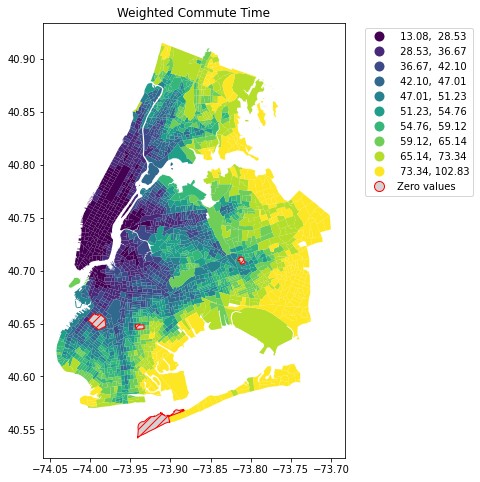

In [166]:
tract_info.plot(column = 'w_tt',figsize = (10,8), k=10, scheme='Quantiles', legend=True, 
              missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Zero values"},
              legend_kwds={'bbox_to_anchor': (1.05, 1), 'loc': 'upper left'})
plt.title('Weighted Commute Time')
plt.show()

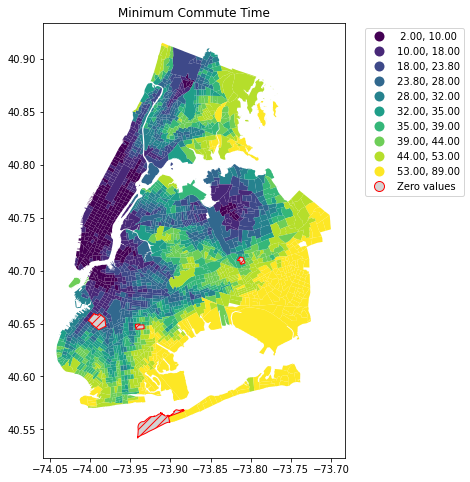

In [167]:
tract_info.plot(column = 'min_tt',figsize = (10,8), k=10, scheme='Quantiles', legend=True, 
              missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Zero values"},
              legend_kwds={'bbox_to_anchor': (1.05, 1), 'loc': 'upper left'})
plt.title('Minimum Commute Time')
plt.show()

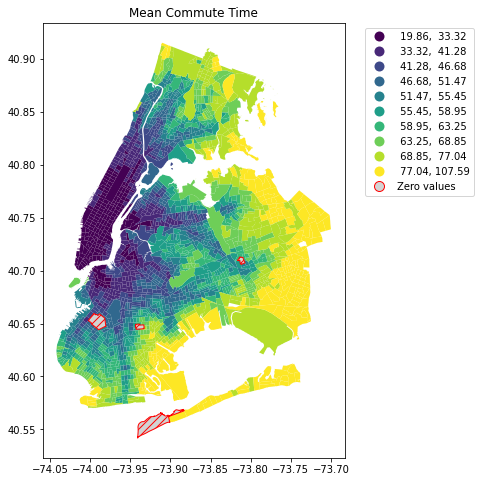

In [168]:
tract_info.plot(column = 'mean_tt',figsize = (10,8), k=10, scheme='Quantiles', legend=True, 
              missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Zero values"},
              legend_kwds={'bbox_to_anchor': (1.05, 1), 'loc': 'upper left'})
plt.title('Mean Commute Time')
plt.show()

# SAMI Calculation

In [169]:
tract_info.columns

Index(['ctlabel', 'boro_code', 'boro_name', 'ct2010', 'boro_ct2010',
       'cdeligibil', 'ntacode', 'ntaname', 'puma', 'shape_leng', 'shape_area',
       'geometry', 'Bus_Access', 'Subway_Access', 'Bus_Count', 'Subway_Count',
       'Center_Lat', 'Center_Lon', 'area_km2', 'formatted', 'CBD1', 'CBD2',
       'CBD3', 'CBD4', 'CBD5', 'CBD6', 'CBD7', 'CBD8', 'CBD9', 'CBD10',
       'CBD11', 'CBD12', 'CBD13', 'CBD14', 'CBD15', 'CBD16', 'CBD17', 'CBD18',
       'CBD19', 'CBD20', 'CBD21', 'CBD22', 'w_tt', 'mean_tt', 'min_tt',
       'Pop_Tot', 'Pop_18', '%White', '%NonWhite', '%Black', '%Hispanic_',
       '%Asian', '%Other', '%Mixed', '%Edu_hs', '%Edu_bac', 'J_Tot', 'J_W_1',
       'J_B_1', 'Median_Inc', 'Agg_Inc', 'M_Age_Wor', 'M_Age_All', 'WhiteTot',
       'WhiteAbove18', 'BlackTot', 'BlackAbove18', 'Hispanic_Tot',
       'Hispanic_Above18', 'AsianTot', 'AsianAbove18', 'OtherTot',
       'OtherAbove18', 'MixedTot', 'MixedAbove18', 'Edu_hsTot',
       'Edu_hsAbove18', 'Edu_bacTot', 'Edu_b

In [170]:
len(tract_info)

2041

In [171]:
len(tract_info[tract_info['Median_Inc']<0])

62

In [172]:
# tract_info[tract_info['min_commute']==0][['CBD1','CBD2','CBD3','CBD4','Center_Lat','Center_Lon']]

In [173]:

tract_info = tract_info.dropna(subset=['Pop_Tot','mean_tt','min_tt','Median_Inc'],how='any')
tract_info = tract_info[tract_info['Pop_Tot']>0]
tract_info = tract_info[tract_info['Median_Inc']>0]
tract_info['mean_tt'] = tract_info['mean_tt'].replace(0, 1)
tract_info['min_tt'] = tract_info['min_tt'].replace(0, 1)

In [174]:
np.shape(tract_info)

(1977, 79)

In [175]:
tract_info = tract_info.sort_values(by = 'Pop_Tot')
tract_info[['Pop_Tot','Pop_18','Median_Inc','mean_tt']].head()

,Pop_Tot,Pop_18,Median_Inc,mean_tt
36061009400,71,71,150893,24.636364
36061011300,98,98,95313,19.863636
36061010900,172,149,167750,21.909091
36061009600,177,177,130500,25.772727
36047054300,283,258,116875,44.500000


In [176]:
np.shape(tract_info)

(1977, 79)

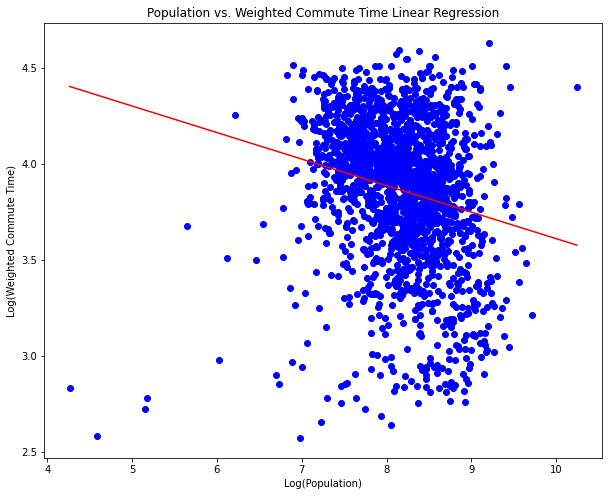

In [177]:
# Conduct linear regression
X = np.asarray(np.log(tract_info['Pop_Tot'])).reshape(-1, 1)
y = np.asarray(np.log(tract_info['w_tt'])).reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)
coef = regressor.coef_[0][0]
intc = regressor.intercept_[0]
e_intc = np.exp(intc)
r_squared = regressor.score(X, y)

# Create scatter plot and legend
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(X, y,'o', color='blue')
ax.plot(X, y_pred, color='red')
ax.set_xlabel('Log(Population)')
ax.set_ylabel('Log(Weighted Commute Time)')
ax.set_title('Population vs. Weighted Commute Time Linear Regression')
plt.show()


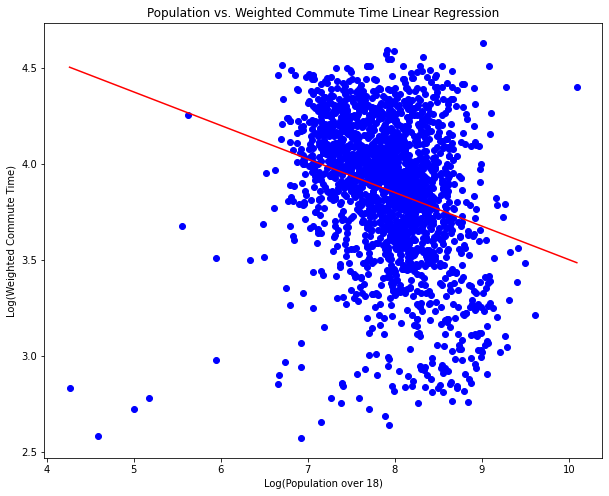

In [178]:
# Conduct linear regression
tract_info = tract_info.sort_values(by = 'Pop_18')

X = np.asarray(np.log(tract_info['Pop_18'])).reshape(-1, 1)
y = np.asarray(np.log(tract_info['w_tt'])).reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)
coef = regressor.coef_[0][0]
intc = regressor.intercept_[0]
e_intc = np.exp(intc)
r_squared = regressor.score(X, y)

# Create scatter plot and legend
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(X, y,'o', color='blue')
ax.plot(X, y_pred, color='red')
ax.set_xlabel('Log(Population over 18)')
ax.set_ylabel('Log(Weighted Commute Time)')
ax.set_title('Population vs. Weighted Commute Time Linear Regression')
plt.show()

In [179]:
np.shape(tract_info)

(1977, 79)

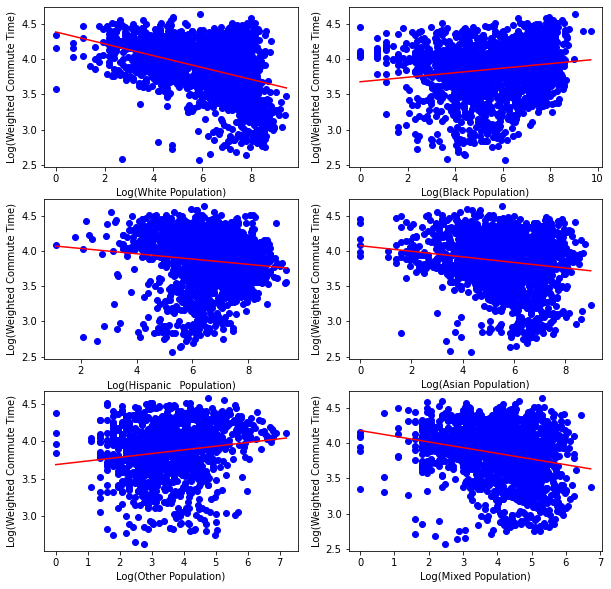

In [180]:
#look by race
race_cols_tots = ['WhiteTot', 'BlackTot', 'Hispanic_Tot', 'AsianTot', 'OtherTot', 'MixedTot']
race_cols_above18 = ['WhiteAbove18', 'BlackAbove18','Hispanic_Above18','AsianAbove18','OtherAbove18', 'MixedAbove18']

fig, ax = plt.subplots(3, 2, figsize=(10, 10))

for i, col in enumerate(race_cols_tots):
    name = col[:-3]
    tract_info_race = tract_info[tract_info[col]>0]
    tract_info_race = tract_info_race.sort_values(by = col)

    # Conduct linear regression
    X = np.asarray(np.log(tract_info_race[col])).reshape(-1, 1)
    y = np.asarray(np.log(tract_info_race['w_tt'])).reshape(-1, 1)
    regressor = LinearRegression()
    regressor.fit(X, y)
    y_pred = regressor.predict(X)

    # Create scatter plot and legend
    row = i // 2  # integer division to get row index
    col = i % 2   # modulo operator to get column index
    ax[row, col].plot(X, y, 'o', color='blue')
    ax[row, col].plot(X, y_pred, color='red')
    ax[row, col].set_xlabel(f'Log({name} Population)')
    ax[row, col].set_ylabel('Log(Weighted Commute Time)')

plt.show()

In [181]:
np.shape(tract_info)

(1977, 79)

# Linear Regression of Income and Commute Time

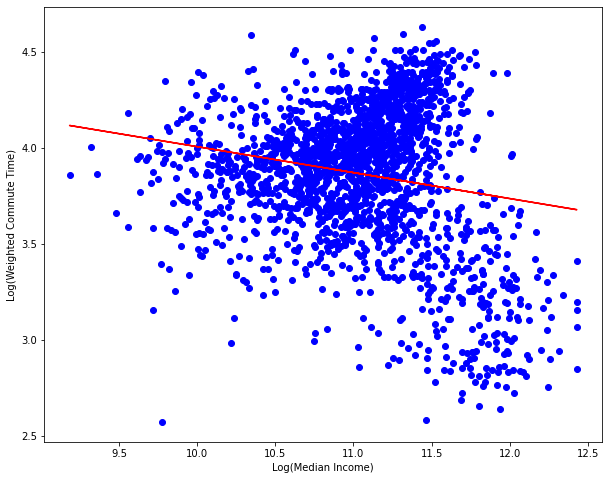

In [182]:
# Conduct linear regression
X = np.asarray(np.log(tract_info['Median_Inc'])).reshape(-1, 1)
y = np.asarray(np.log(tract_info['w_tt'])).reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)
coef = regressor.coef_[0][0]
intc = regressor.intercept_[0]
e_intc = np.exp(intc)
r_squared = regressor.score(X, y)

# Create scatter plot and legend
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(X, y,'o', color='blue')
ax.plot(X, y_pred, color='red')
ax.set_xlabel('Log(Median Income)')
ax.set_ylabel('Log(Weighted Commute Time)')
# ax.set_title('Population vs. Mean Commute Time Linear Regression')
plt.show()

In [183]:
np.shape(tract_info)

(1977, 79)

In [184]:
r_squared

0.034206206277229145

In [185]:
import statsmodels.api as sm
X = np.asarray(np.log(tract_info['Median_Inc'])).reshape(-1, 1)
y = np.asarray(np.log(tract_info['w_tt'])).reshape(-1, 1)
X = sm.add_constant(X)


# Create the linear regression model
model = sm.OLS(y, X)

# Fit the model and print the results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     69.95
Date:                Wed, 03 May 2023   Prob (F-statistic):           1.13e-16
Time:                        15:12:45   Log-Likelihood:                -793.04
No. Observations:                1977   AIC:                             1590.
Df Residuals:                    1975   BIC:                             1601.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3612      0.179     29.965      0.0

In [186]:
results.params

array([ 5.36119247, -0.1353835 ])

# Look at Commute time distribution for majority white and non-white census tracts

In [187]:
#introduce a custom function performing distribution analysis
def distribution_analysis(x, log_scale = False, fit_distribution = 'None', bins = 50, vis_means = True, vis_curve = True, print_outputs = True):
    #x - array of observations
    #log_scale - analyze distribution of log(x) if True
    #fit_distribution - fit the distribution ('normal', 'gev' or 'pareto') or do nothing if 'None'
    #bins - how many bins to use for binning the data
    #vis_means - show mean and std lines if True
    #vis_curve - show interpolated distribution curve over the histogram bars if True
    #print_outputs - print mean, std and percentiles
    
    if log_scale: 
        x1 = np.log10(x) #convert data to decimal logarithms
        xlabel = 'log(values)' #reflect in x labels
    else:
        x1 = x #leave original scale 
        xlabel = 'values'
    mu = x1.mean() #compute the mean
    if log_scale: #if logscale, output all three - log mean, its original scale and original scale mean
        print('Log mean = {:.2f}({:.2f}), mean = {:.2f}'.format(mu,10**mu,x.mean()))
    else:
        print('Mean = {:.2f}'.format(mu)) #otherwise print mean
    sigma = x1.std() #compute and output standard deviation 
    print('Standard deviation = {:.2f}'.format(sigma))
    for p in [1,5,25,50,75,95,99]: #output percentile values
        print('{:d} percentile = {:.2f}'.format(p,np.percentile(x,p)))
        
    #visualize histogram and the interpolated line (if vis_curve=True) using seaborn
    sns.distplot(x1, hist=True, kde=vis_curve, 
        bins=bins,color = 'darkblue', 
        hist_kws={'edgecolor':'black'},
        kde_kws={'linewidth': 4})
    
    #show vertical lines for mean and std if vis_means = True
    if vis_means:
        plt.axvline(mu, color='r', ls='--', lw=2.0)
        plt.axvline(mu-sigma, color='g', ls='--', lw=2.0)
        plt.axvline(mu+sigma, color='g', ls='--', lw=2.0)
        
    ylim = plt.gca().get_ylim() #keep the y-range of original distribution density values 
    #(to make sure the fitted distribution would not affect it)
    
    h = np.arange(mu - 3 * sigma, mu + 3 * sigma, sigma / 100) #3-sigma visualization range for the fitted distribution
    pars = None #fitted distribution parameters
    
    #fit and visualize the theoretic distribution
    if fit_distribution == 'normal':
        pars = norm.fit(x1)
        plt.plot(h,norm.pdf(h,*pars),'r')
    elif fit_distribution == 'gev':
        pars = gev.fit(x1)
        plt.plot(h,gev.pdf(h,*pars),'r')
    elif fit_distribution == 'pareto':
        pars = pareto.fit(x1)
        plt.plot(h,pareto.pdf(h,*pars),'r')
    
    plt.xlabel(xlabel) #add x label 
    plt.ylim(ylim) #restore the y-range of original distribution density values 
    plt.show()
    return pars

#check if the distribution is normal using one-sample KS test and sample mean-std
def is_normal(x):
        return stats.kstest(x,'norm',args=(x.mean(),x.std()))

In [188]:
white_df = tract_info[tract_info['%White']>50]
nonwhite_df = tract_info[tract_info['%White']<50]
print(len(white_df),len(nonwhite_df))

582 1395


Mean = 43.97
Standard deviation = 18.11
1 percentile = 15.73
5 percentile = 17.56
25 percentile = 27.63
50 percentile = 45.32
75 percentile = 56.61
95 percentile = 74.73
99 percentile = 85.52


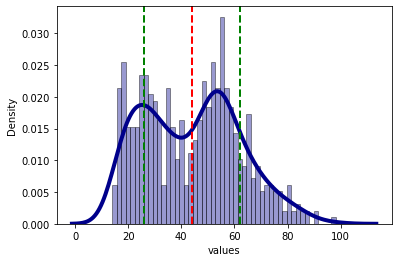

In [189]:
distribution_analysis(white_df['w_tt'])

Mean = 53.63
Standard deviation = 15.01
1 percentile = 23.28
5 percentile = 31.21
25 percentile = 42.68
50 percentile = 52.29
75 percentile = 63.68
95 percentile = 80.38
99 percentile = 89.30


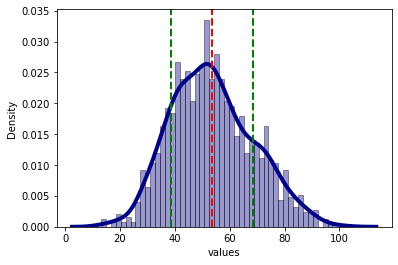

In [190]:
distribution_analysis(nonwhite_df['w_tt'])

Mean = 49.01
Standard deviation = 17.75
1 percentile = 22.49
5 percentile = 24.05
25 percentile = 32.45
50 percentile = 49.95
75 percentile = 61.50
95 percentile = 78.99
99 percentile = 88.85


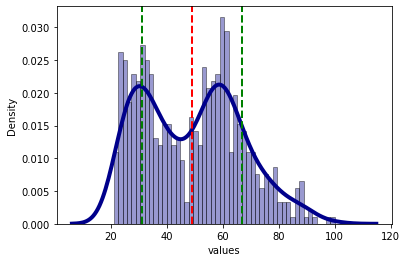

In [191]:
distribution_analysis(white_df['mean_tt'])

Mean = 57.76
Standard deviation = 14.58
1 percentile = 29.14
5 percentile = 35.70
25 percentile = 47.23
50 percentile = 56.41
75 percentile = 67.39
95 percentile = 84.21
99 percentile = 93.13


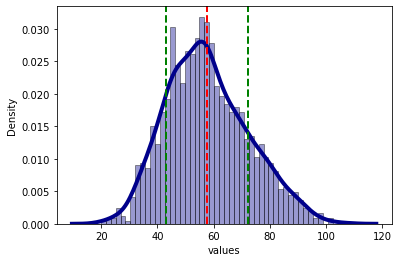

In [192]:
distribution_analysis(nonwhite_df['mean_tt'])

Mean = 26.68
Standard deviation = 16.38
1 percentile = 2.81
5 percentile = 5.00
25 percentile = 10.00
50 percentile = 29.00
75 percentile = 39.00
95 percentile = 52.00
99 percentile = 66.38


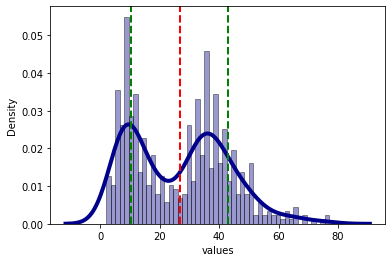

In [193]:
distribution_analysis(white_df['min_tt'])

Mean = 34.09
Standard deviation = 15.18
1 percentile = 6.00
5 percentile = 11.00
25 percentile = 24.00
50 percentile = 32.00
75 percentile = 43.00
95 percentile = 62.00
99 percentile = 76.06


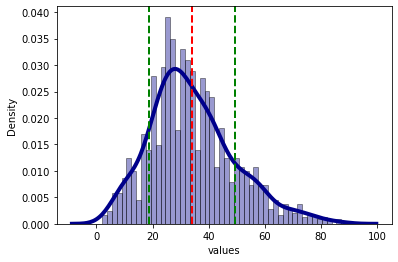

In [194]:
distribution_analysis(nonwhite_df['min_tt'])

In [195]:
### t-tests the means

In [196]:
from scipy import stats

stats.ttest_ind(white_df['min_tt'],nonwhite_df['min_tt'])

Ttest_indResult(statistic=-9.657272225064917, pvalue=1.3625614947294233e-21)

In [197]:
stats.ttest_ind(white_df['mean_tt'],nonwhite_df['mean_tt'])

Ttest_indResult(statistic=-11.383854002413264, pvalue=3.983625529112577e-29)

In [198]:
stats.ttest_ind(white_df['w_tt'],nonwhite_df['w_tt'])

Ttest_indResult(statistic=-12.252228966567083, pvalue=2.5624916023649192e-33)

In [199]:
### k-s test for distribution
stats.ks_2samp(white_df['min_tt'],nonwhite_df['min_tt'])

KstestResult(statistic=0.2742120237963271, pvalue=1.1102230246251565e-16)

In [200]:
stats.ks_2samp(white_df['mean_tt'],nonwhite_df['mean_tt'])

KstestResult(statistic=0.28406680707977683, pvalue=1.1102230246251565e-16)

In [201]:
stats.ks_2samp(white_df['w_tt'],nonwhite_df['w_tt'])

KstestResult(statistic=0.28235967926689576, pvalue=1.1102230246251565e-16)